## Conjecture: the t-atom on $n$ vertices with the smallest largest eigenvalues if the one that minimizes number of edges

### The number of edges of a t-atom is completly defined by the sequence $(1, 1, b_3, \dots, b_t)$ of the partition sizes

$\textit{Proposition}$: the number of edges is minimized if the sizes of the last partitions are maximized:

$\textit{proof}$: Consider a sequence $B = (1, 1, b_3, \dots, b_t)$ and assume that it is possible to construct a t-atom from a sequence $C = (1, 1, \dots, b_j-1, \dots, b_i+1, \dots, b_t)$. We want to show that the sequence this sequence have less edges.

$$E(C)-E(B) = (t-i) - (t-j) = j-i < 0$$

Also, it is easy to observe that the sequence generated by this greedy procedure is unique

In [5]:
from sage.graphs.graph_coloring import grundy_coloring
import numpy as np
import scipy.linalg as la

In [7]:
def t_atom_from_seq(B):
    # Receives partition sequence B and returns a random t-atom with respect to this partition.
    n = sum(B)
    G = Graph()
    
    size = 1
    for bi in B[1:]: 
        assert bi <= size
        
        # Create random matching
        prev = np.random.permutation(np.arange(size))
        for j in range(bi):
            G.add_edge((size + j, prev[j]))
        
        # Add remaining edges at random
        if bi < size:
            rand_bi = np.random.randint(bi, size=(size - bi))
            for j in range(size - bi):
                G.add_edge((prev[bi + j], size + rand_bi[j]))

        size += bi   
        
    return G

In [45]:
def partition(n, t, answer, current, max_size=1e9):
    #print(current, t)
    # partition of n in t parts that can generate t-atom
    
    if len(answer) > max_size:
        return
    
    if len(current) == 0:
        current.append(1)
        partition(n-1, t-1, answer, current)
        current.pop()
        return
    
    size = sum(current)

    if t == 1:
        if size >= n and n > 0:
            current.append(n)
            answer.append(current.copy())
            current.pop()
        return
           
    for i in range(1, min(n-t+1, size)+1):
        current.append(i)
        partition(n-i, t-1, answer, current)
        current.pop()

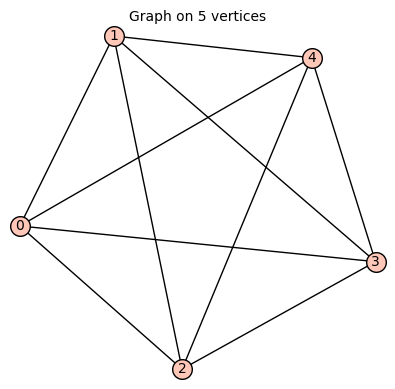

In [44]:
t_atom_from_seq([1, 1, 1, 1, 1])

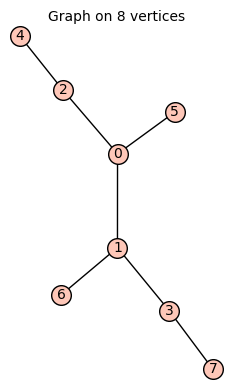

In [45]:
t_atom_from_seq([1, 1, 2, 4])

4


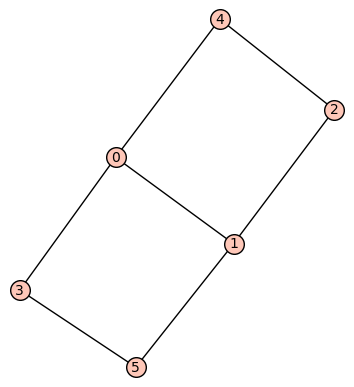

In [52]:
G = t_atom_from_seq([1, 1, 2, 2])
print(grundy_coloring(G, len(G)))
G.plot().show()

In [119]:
answer = []
current = []
partition(8, 6, answer, current)
print(answer)

[[1, 1, 1, 1, 1, 3], [1, 1, 1, 1, 2, 2], [1, 1, 1, 1, 3, 1], [1, 1, 1, 2, 1, 2], [1, 1, 1, 2, 2, 1], [1, 1, 1, 3, 1, 1], [1, 1, 2, 1, 1, 2], [1, 1, 2, 1, 2, 1], [1, 1, 2, 2, 1, 1]]


In [137]:
t = 5
for n in range(t, (1<<(t-1))+1):
    print("using n = ", n)
    answer = []
    current = []
    partition(n, t, answer, current)
    for B in answer:
        G = t_atom_from_seq(B)
        eigvals, eigvecs = la.eig(G.adjacency_matrix())
        
        edges = G.size()
        print(edges, np.real(max(eigvals)))
        
        if n == 8:
            print(G.graph6_string())

using n =  5
10 4.0
using n =  6
10 3.56155281280883
11 3.858951435239746
12 4.119026675525924
using n =  7
10 3.4411693713897473
11 3.4219392278939895
12 3.8284271247461916
12 3.613714462470524
13 3.921072417914716
using n =  8
10 3.3027756377319957
G~_Q@?
11 3.173197840779193
Gz`D?o
12 3.246214472811189
GxQBSg
12 3.534418480423117
Gk|C@o
13 3.319414164659673
Gqov?w
14 3.931508215881967
GkHCf{
using n =  9
11 3.112900300890214
12 3.0430128328193007
12 3.369632965857268
13 3.1792125216550238
14 3.4554808870450615
15 3.950585189042101
using n =  10
11 2.977085465819615
12 3.1214917936267477
12 3.243720316851152
13 3.152625375759508
14 3.039881422255769
15 3.296793689015214
using n =  11
12 2.8098352259856343
13 2.8915566008467364
14 2.89193580052127
15 3.567724487165235
using n =  12
12 2.7746228995044886
13 2.795944171985107
14 2.9782439074361453
15 2.850376989705751
using n =  13
14 2.7118638038615703
15 2.8894184942144823
using n =  14
14 2.728801129436592
15 2.6212844676139713
using

### The following graph is a 5-atom on 8 vertices with 10 edges and has larges eigenvalue 3.3027756377319957

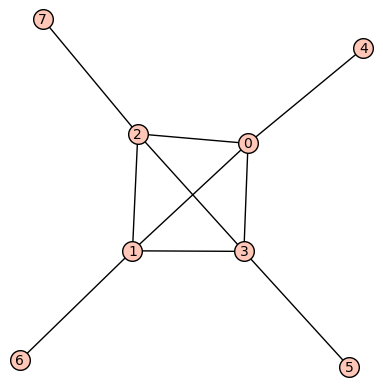

grundy: 5, eigval: 3.3027756377319957


In [14]:
G = Graph("G~_Q@?")
G.plot().show()
print(f"grundy: {grundy_coloring(G, len(G))}, eigval: {np.real(max(la.eig(G.adjacency_matrix())[0]))}")

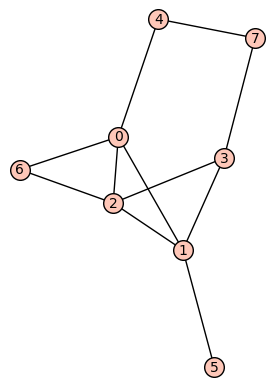

grundy: 5, eigval: 3.173197840779193


In [6]:
G = Graph("Gz`D?o")
G.plot().show()
print(f"grundy: {grundy_coloring(G, len(G))}, eigval: {np.real(max(la.eig(G.adjacency_matrix())[0]))}")

# Bound using interlacing

### The largest eigenvalue of a $t$-atom is bounded by the largest eigenvalue of the quotient symetric matrix $B$, such that $B_{i, j} = \sqrt{\frac{b_i}{b_j}}$ for $i < j$

In [23]:
def matrix_from_seq(B):
    t = len(B)
    A = np.zeros((t, t))
    for j in range(t):
        for i in range(j):
            A[i][j] = A[j][i] = np.sqrt(B[i]/B[j])
    return A

In [25]:
matrix_from_seq([1, 1, 2, 4])

array([[0.        , 1.        , 0.70710678, 0.5       ],
       [1.        , 0.        , 0.70710678, 0.5       ],
       [0.70710678, 0.70710678, 0.        , 0.70710678],
       [0.5       , 0.5       , 0.70710678, 0.        ]])

In [27]:
t = 5
for n in range(t, (1<<(t-1))+1):
    print("using n = ", n)
    answer = []
    current = []
    partition(n, t, answer, current)
    for B in answer:
        A = matrix_from_seq(B)
        eigvals, eigvecs = la.eig(A)        
        print(B, np.real(max(eigvals)))

using n =  5
[1, 1, 1, 1, 1] 4.0
using n =  6
[1, 1, 1, 1, 2] 3.5615528128088294
[1, 1, 1, 2, 1] 3.832292504632112
[1, 1, 2, 1, 1] 4.1190266755259195
using n =  7
[1, 1, 1, 1, 3] 3.392969448600091
[1, 1, 1, 2, 2] 3.3027756377319957
[1, 1, 1, 3, 1] 3.8284271247461885
[1, 1, 2, 1, 2] 3.6090495690651334
[1, 1, 2, 2, 1] 3.9172859930935386
using n =  8
[1, 1, 1, 1, 4] 3.302775637731996
[1, 1, 1, 2, 3] 3.0933660991864955
[1, 1, 1, 3, 2] 3.2360679774997894
[1, 1, 2, 1, 3] 3.410133464460097
[1, 1, 2, 2, 2] 3.302775637731994
[1, 1, 2, 3, 1] 3.90747414839798
using n =  9
[1, 1, 1, 2, 4] 2.9793488587460435
[1, 1, 1, 3, 3] 3.0000000000000004
[1, 1, 2, 1, 4] 3.3027756377319926
[1, 1, 2, 2, 3] 3.0538509209502345
[1, 1, 2, 3, 2] 3.2246211004647702
[1, 1, 2, 4, 1] 3.9490526771196452
using n =  10
[1, 1, 1, 2, 5] 2.9072459874675536
[1, 1, 1, 3, 4] 2.870828693386969
[1, 1, 2, 1, 5] 3.2352998866290776
[1, 1, 2, 2, 4] 2.916105827293624
[1, 1, 2, 3, 3] 2.9441923534012857
[1, 1, 2, 4, 2] 3.209347583964505
u

using n =  8
(6.9999999999999964, [1, 1, 1, 1, 1, 1, 1, 1])
using n =  9
(6.535533905932732, [1, 1, 1, 1, 1, 1, 1, 2])
using n =  10
(6.162277660168384, [1, 1, 1, 1, 1, 1, 2, 2])
using n =  11
(5.915475947422651, [1, 1, 1, 1, 1, 2, 2, 2])
using n =  12
(5.69240386398291, [1, 1, 1, 1, 1, 2, 2, 3])
using n =  13
(5.534114874056346, [1, 1, 1, 1, 1, 2, 3, 3])
using n =  14
(5.397943685261412, [1, 1, 1, 1, 2, 2, 3, 3])
using n =  15
(5.252670103906645, [1, 1, 1, 1, 2, 2, 3, 4])
using n =  16
(5.148178889300751, [1, 1, 1, 1, 2, 3, 3, 4])
using n =  17
(5.044554337794197, [1, 1, 1, 1, 2, 3, 4, 4])
using n =  18
(4.940373940073474, [1, 1, 1, 1, 2, 3, 4, 5])
using n =  19
(4.868960056232881, [1, 1, 1, 1, 2, 3, 4, 6])
using n =  20
(4.800466297268851, [1, 1, 1, 1, 2, 3, 5, 6])
using n =  21
(4.741008771769561, [1, 1, 1, 1, 2, 4, 5, 6])
using n =  22
(4.683315072113714, [1, 1, 1, 1, 2, 4, 5, 7])
using n =  23
(4.633524128217901, [1, 1, 1, 1, 2, 4, 6, 7])
using n =  24
(4.581059116030962, [1, 1, 1

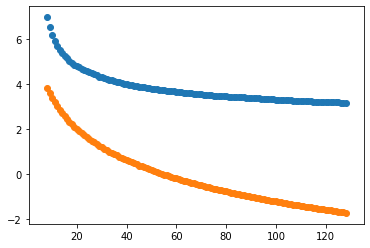

In [37]:
t = 8

X = []
Y = []
Y2 = []

for n in range(t, (1<<(t-1))+1):
    print("using n = ", n)
    answer = []
    current = []
    partition(n, t, answer, current)
    
    minimum_seq = (1e9, [])
    for B in answer:
        A = matrix_from_seq(B)
        eigvals, eigvecs = la.eig(A)
        minimum_seq = min(minimum_seq, (np.real(max(eigvals)), B))
    
    X.append(n)
    Y.append(minimum_seq[0])
    Y2.append(t-2*np.log(n))
    
    print(minimum_seq)


import matplotlib.pyplot as plt

plt.scatter(X, Y)
plt.scatter(X, Y2)


In [39]:
def reighley_1(B):
    t = len(B)
    ret = 0.0
    for j in range(t):
        for i in range(j):
            ret += np.sqrt(B[i]/B[j])
    ret *= 2/t
    return ret

In [42]:
reighley_1([1, 1, 2, 4, 8, 16, 32, 64])

3.124461126790528

using n =  9
(8.0, [1, 1, 1, 1, 1, 1, 1, 1, 1])
using n =  10
(7.479300944331637, [1, 1, 1, 1, 1, 1, 1, 1, 2])
using n =  11
(7.088776652580365, [1, 1, 1, 1, 1, 1, 1, 2, 2])
using n =  12
(6.8284271247461845, [1, 1, 1, 1, 1, 1, 2, 2, 2])
using n =  13
(6.573861366940392, [1, 1, 1, 1, 1, 1, 2, 2, 3])
using n =  14
(6.400852684277832, [1, 1, 1, 1, 1, 1, 2, 3, 3])
using n =  15
(6.243638015145721, [1, 1, 1, 1, 1, 1, 2, 3, 4])
using n =  16
(6.082455841294797, [1, 1, 1, 1, 1, 2, 2, 3, 4])
using n =  17
(5.97030845121726, [1, 1, 1, 1, 1, 2, 2, 3, 5])
using n =  18
(5.857721468377972, [1, 1, 1, 1, 1, 2, 3, 3, 5])
using n =  19
(5.744324752789874, [1, 1, 1, 1, 1, 2, 3, 4, 5])
using n =  20
(5.65646868920062, [1, 1, 1, 1, 1, 2, 3, 4, 6])
using n =  21
(5.582326987434288, [1, 1, 1, 1, 1, 2, 3, 5, 6])
using n =  22
(5.512456619086892, [1, 1, 1, 1, 1, 2, 3, 5, 7])
using n =  23
(5.4462936418973555, [1, 1, 1, 1, 2, 2, 3, 5, 7])
using n =  24
(5.378054779859144, [1, 1, 1, 1, 2, 2, 4, 5, 7])
using n

(3.652637503461995, [1, 1, 1, 2, 5, 10, 20, 36, 58])
using n =  135
(3.6476000388747636, [1, 1, 1, 2, 5, 10, 20, 36, 59])
using n =  136
(3.6426890415709448, [1, 1, 1, 2, 5, 10, 20, 36, 60])
using n =  137
(3.637864927866979, [1, 1, 1, 2, 5, 10, 20, 37, 60])
using n =  138
(3.6330556508742418, [1, 1, 1, 2, 5, 10, 20, 37, 61])
using n =  139
(3.6283632016549023, [1, 1, 1, 2, 5, 10, 20, 37, 62])
using n =  140
(3.623755174635997, [1, 1, 1, 2, 5, 10, 20, 38, 62])
using n =  141
(3.6191565365686866, [1, 1, 1, 2, 5, 10, 20, 38, 63])
using n =  142
(3.6146661045567128, [1, 1, 1, 2, 5, 10, 20, 38, 64])
using n =  143
(3.610259729846355, [1, 1, 1, 2, 5, 10, 20, 39, 64])
using n =  144
(3.605856040358538, [1, 1, 1, 2, 5, 10, 20, 39, 65])
using n =  145
(3.601552817718606, [1, 1, 1, 2, 5, 10, 20, 39, 66])
using n =  146
(3.59733494773763, [1, 1, 1, 2, 5, 10, 20, 40, 66])
using n =  147
(3.593112127781198, [1, 1, 1, 2, 5, 10, 20, 40, 67])
using n =  148
(3.5889828041392464, [1, 1, 1, 2, 5, 10, 20

(3.2920812794686944, [1, 1, 2, 4, 8, 16, 32, 64, 125])
using n =  254
(3.290034422455534, [1, 1, 2, 4, 8, 16, 32, 64, 126])
using n =  255
(3.2880117887602927, [1, 1, 2, 4, 8, 16, 32, 64, 127])
using n =  256
(3.286012904341157, [1, 1, 2, 4, 8, 16, 32, 64, 128])


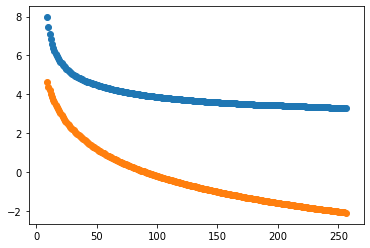

In [48]:
t = 9

X = []
Y = []
Y2 = []

for n in range(t, (1<<(t-1))+1):
    print("using n = ", n)
    answer = []
    current = []
    partition(n, t, answer, current, max_size=1000)
    
    minimum_seq = (1e9, [])
    for B in answer:
        val = reighley_1(B)
        minimum_seq = min(minimum_seq, (val, B))
    
    X.append(n)
    Y.append(minimum_seq[0])
    Y2.append(t-2*np.log(n))
    
    print(minimum_seq)


import matplotlib.pyplot as plt

plt.scatter(X, Y)
plt.scatter(X, Y2)
